In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxpy as cp
import scipy as sc

# Generate a toy dataset
n_samples = 20
dim = 60000

X_train, Y = datasets.make_blobs(n_samples=n_samples, n_features=dim, centers=2, cluster_std=[2.0, 2.0], random_state=42)
Y = Y * 2 - 1
Y_train = np.reshape(Y, (len(Y), 1))
# print(X_train)
# print(Y_train)

#X = np.insert(X, 0, r, axis=1)
ss = sc.sparse.linalg.svds(X_train)
print(ss[1])
s0 = np.max(ss[0])
s1 = np.max(ss[1])
s2 = np.max(ss[2])

# print(s0)
# print(s1)
lr = 1/(s1**2)
print(1/(s1**2))



def SVM(x_train, y_train):
    # SVM

    s_s = cp.Variable((x_train.shape[1], 1))
    # b_s = cp.Variable()

    objective = cp.Minimize(cp.norm(s_s) ** 2)
    constraints = [cp.multiply(y_train, x_train @ s_s) >= 1]
    prob = cp.Problem(objective, constraints)

    prob.solve(solver = cp.SCS)
    s_s_value = s_s.value
    # b_s_value = b_s.value
    return s_s_value



def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    #f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(w*w)
    f = np.sum(np.logaddexp(0, -yXw))
    gMul = np.exp(-yXw)/(1 + np.exp(-yXw))
    ymul = -1*yT*gMul
    #g =  np.matmul(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = np.matmul(ymul.reshape(1, -1), X)
    #g = np.dot(X.T,ymul) + lam*w.reshape(1,-1)
    g = g.reshape(-1, 1)
    return [f, g]


def model_logloss(x_train, y_train,c, num_iterations, learning_rate):
    w_log = np.zeros((x_train.shape[1], 1))  # GRADED FUNCTION: initialize_with_zeros
    distances =[]
    # Gradient descent
    # GRADED FUNCTION: optimize
    for i in range(num_iterations):
        # GRADED FUNCTION: propagate

        # dw_sl = np.dot(x_train.T, (np.dot(x_train, w_log) - y_train))
        # cost, dw_log = LogisticLossNaive(w_log, x_train, y_train, 1)

        [cost, dw_log] = LogisticLoss(w_log, x_train, y_train, 1)
        # print(cost)
        # print(dw_log)

        w_log = w_log - learning_rate * dw_log
        # cost = np.linalg.norm(x_train@w_sl - y_train)

#         if (cost<1e-5):
#                  break
        if i % 1000 == 0:
            #costs.append(cost)
            distance = np.linalg.norm(w_log/np.linalg.norm(w_log)-c/np.linalg.norm(c))
            distances.append(distance)
#             w_logs.append(w_log)
            print("Cost after iteration %i: %f" % (i, cost))
            # Print the cost every 1000 training examples
    return distances


def train(lr):
    w_s_in = SVM(X_train, Y_train)
    distances = model_logloss(X_train,Y_train,w_s_in, 500000, lr)
    # print(w_log)
    

    # print(w_log_norm[0:3])
    # print(w_s_norm[0:3])
    # print(w_s[0:3])
    # print(w_log[0:3])
    # print(distance2)
    return  distances



# xp = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
# yp = - (w_s[0] * xp) / w_s[1]
# idx0 = np.where(Y_train == -1)
# idx1 = np.where(Y_train == 1)
#
# plt.plot(X_train[idx0, 0], X_train[idx0, 1], 'rx')
# plt.plot(X_train[idx1, 0], X_train[idx1, 1], 'bo')
# plt.plot(xp, yp, '--b', label='SVM')
#
# yp1 = - (w_log[0] * xp) / w_log[1]
# plt.plot(xp, yp1, '-r', label='log')
# plt.title('log')
# plt.legend()
# plt.show()



[ 494.43227899  495.8902722   496.76403061  497.88588468 4481.58033565
 4512.00992796]
4.912017516552114e-08


In [73]:
n_features_list = np.arange(10, dim+1, 100)
costs =[]

w_log_norms = []
w_s_norms = []

ss = sc.sparse.linalg.svds(X_train)
s1 = np.max(ss[1])



distance2 = train(1/(s1**2)*0.1)
print(len(distance2))

Cost after iteration 0: 13.862944
Cost after iteration 1000: 0.208770
Cost after iteration 2000: 0.103204
Cost after iteration 3000: 0.068478
Cost after iteration 4000: 0.051223
Cost after iteration 5000: 0.040908
Cost after iteration 6000: 0.034049
Cost after iteration 7000: 0.029159
Cost after iteration 8000: 0.025496
Cost after iteration 9000: 0.022650
Cost after iteration 10000: 0.020376
Cost after iteration 11000: 0.018516
Cost after iteration 12000: 0.016968
Cost after iteration 13000: 0.015658
Cost after iteration 14000: 0.014536
Cost after iteration 15000: 0.013564
Cost after iteration 16000: 0.012714
Cost after iteration 17000: 0.011964
Cost after iteration 18000: 0.011298
Cost after iteration 19000: 0.010701
Cost after iteration 20000: 0.010165
Cost after iteration 21000: 0.009680
Cost after iteration 22000: 0.009239
Cost after iteration 23000: 0.008836
Cost after iteration 24000: 0.008467
Cost after iteration 25000: 0.008128
Cost after iteration 26000: 0.007815
Cost after it

Cost after iteration 219000: 0.000926
Cost after iteration 220000: 0.000922
Cost after iteration 221000: 0.000918
Cost after iteration 222000: 0.000913
Cost after iteration 223000: 0.000909
Cost after iteration 224000: 0.000905
Cost after iteration 225000: 0.000901
Cost after iteration 226000: 0.000897
Cost after iteration 227000: 0.000893
Cost after iteration 228000: 0.000889
Cost after iteration 229000: 0.000886
Cost after iteration 230000: 0.000882
Cost after iteration 231000: 0.000878
Cost after iteration 232000: 0.000874
Cost after iteration 233000: 0.000870
Cost after iteration 234000: 0.000867
Cost after iteration 235000: 0.000863
Cost after iteration 236000: 0.000859
Cost after iteration 237000: 0.000856
Cost after iteration 238000: 0.000852
Cost after iteration 239000: 0.000848
Cost after iteration 240000: 0.000845
Cost after iteration 241000: 0.000841
Cost after iteration 242000: 0.000838
Cost after iteration 243000: 0.000834
Cost after iteration 244000: 0.000831
Cost after i

Cost after iteration 435000: 0.000466
Cost after iteration 436000: 0.000465
Cost after iteration 437000: 0.000464
Cost after iteration 438000: 0.000463
Cost after iteration 439000: 0.000462
Cost after iteration 440000: 0.000461
Cost after iteration 441000: 0.000460
Cost after iteration 442000: 0.000459
Cost after iteration 443000: 0.000458
Cost after iteration 444000: 0.000457
Cost after iteration 445000: 0.000456
Cost after iteration 446000: 0.000455
Cost after iteration 447000: 0.000454
Cost after iteration 448000: 0.000453
Cost after iteration 449000: 0.000452
Cost after iteration 450000: 0.000451
Cost after iteration 451000: 0.000450
Cost after iteration 452000: 0.000449
Cost after iteration 453000: 0.000448
Cost after iteration 454000: 0.000447
Cost after iteration 455000: 0.000446
Cost after iteration 456000: 0.000445
Cost after iteration 457000: 0.000444
Cost after iteration 458000: 0.000443
Cost after iteration 459000: 0.000442
Cost after iteration 460000: 0.000441
Cost after i

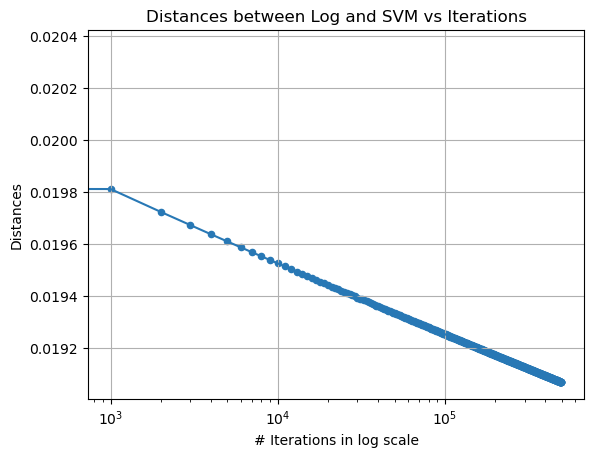

In [93]:
plt.plot(range(0,500000,1000),distance2,c='#2878B5')
plt.scatter(range(0,500000,1000),distance2,c='#2878B5',s=20)
plt.xlabel("# Iterations in log scale")
plt.ylabel("Distances")
plt.title("Distances between Log and SVM vs Iterations")

# plt.legend()
plt.grid()
plt.xscale('log')
plt.savefig('SL_L2_Iterationslog.jpg', dpi=300)
plt.show()

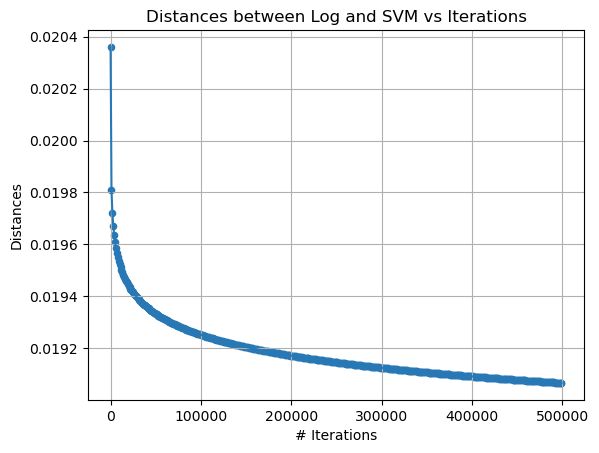

In [94]:
plt.plot(range(0,500000,1000),distance2,c='#2878B5')
plt.scatter(range(0,500000,1000),distance2,c='#2878B5',s=20)
plt.xlabel("# Iterations")
plt.ylabel("Distances")
plt.title("Distances between Log and SVM vs Iterations")

# plt.legend()
plt.grid()
# plt.xscale('log')
plt.savefig('SL_L2_Iterations1.jpg', dpi=300)
plt.show()